In [1]:
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import KFold , cross_val_score
from sklearn import metrics 
from matplotlib import pyplot as plt
from numpy import mean
from numpy import absolute
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from matplotlib import pyplot
from tensorflow.keras.models import load_model
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score, plot_roc_curve, plot_precision_recall_curve, plot_confusion_matrix

Functions

In [2]:
def calculateMetrics(clf, X_test, y_test):
    k = 5
    cv = KFold(n_splits=k, random_state=None)

    scores_a = cross_val_score(clf, X_test, y_test, scoring='accuracy', cv=cv, n_jobs=-1)
    accuracy = mean(absolute(scores_a))

    scores_p = cross_val_score(clf, X_test, y_test, scoring='precision', cv=cv, n_jobs=-1)
    precision = mean(absolute(scores_p))

    scores_r = cross_val_score(clf, X_test, y_test, scoring='recall', cv=cv, n_jobs=-1)
    recall = mean(absolute(scores_r))

    scores_f1 = cross_val_score(clf, X_test, y_test, scoring='f1', cv=cv, n_jobs=-1)
    f1 = mean(absolute(scores_f1))

    print("Accuracy: %.2f" %accuracy)
    print("Precision: %.2f" %precision)
    print("Recall: %.2f" %recall)
    print("F1: %.2f" %f1)

    return accuracy, precision, recall, f1

def calculateMetricsNN(clf, X_test, y_test):
    predicted = clf.predict(X_test, verbose=0)
    predicted_classes =  (clf.predict(X_test) > 0.5).astype("int32")
    # reduce to 1d array
    predicted = predicted[:, 0]
    predicted_classes = predicted_classes[:, 0]

    accuracy = accuracy_score(y_test, predicted_classes)
    precision = precision_score(y_test, predicted_classes)
    recall = recall_score(y_test, predicted_classes)
    f1 = f1_score(y_test, predicted_classes)

    print("Accuracy: %.2f" %accuracy)
    print("Precision: %.2f" %precision)
    print("Recall: %.2f" %recall)
    print("F1: %.2f" %f1)

    return accuracy, precision, recall, f1, predicted, predicted_classes

def featureImportance(clf):
    featureImportance= pd.DataFrame(columns=['Feature', 'Score'])

    importance = clf.feature_importances_
    for p,v in enumerate(importance):
        featureImportance = featureImportance.append({'Feature':p,'Score': v}, ignore_index=True)
    plt.figure(figsize=(20, 5))
    ax = sns.barplot(x=featureImportance.Feature, y=featureImportance.Score, data=featureImportance, color='#00338d')

    features = ['Erstloesung','Schwierigkeit','Wochentag','ist_Schulzeit','MehrfachFalsch','Testposition__FT', 'Testposition__nt', 'Testposition__pruefung',
       'Testposition__training', 'Testposition__version', 'Testposition__vt',
       'Testposition__zt', 'beendet', 'Fehler', 'HA__HA', 'HA__Self', 'HA__nt',
       'HA__vt', 'HA__zt', 'Klassenstufe', 'Jahredabei', 
       'Sex__m', 'Sex__w']

    for f in features:
        print(f)

def confusionMatrix(y_test, predicted, clf, X_test):
    #print(metrics.confusion_matrix(y_test, predicted))
    plot_confusion_matrix(clf, X_test, y_test)  
    plt.show()

def predictX(clf, X_test):
    predicted = clf.predict(X_test)
    return predicted

# def getProbability(clf, X_test):
#     probability = clf.predict_proba(X_test)
#     t = probability[:,:1].tolist()
#     df_prob = pd.DataFrame(t)
#     return df_prob

def precision_recall_curve(y_test, df_prob):
    lr_precision, lr_recall, _ = precision_recall_curve(y_test, df_prob)    
    # plot the precision-recall curves
    no_skill = len(y_test[y_test==1]) / len(y_test)
    pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
    pyplot.plot(lr_recall, lr_precision, marker='.')
    pyplot.xlabel('Recall')
    pyplot.ylabel('Precision')
    pyplot.legend()
    pyplot.show()
     


Decision Tree

In [3]:
DTE_model = pickle.load(open('../02_decisionTree/DecisionTreemodel.pkl', 'rb'))
X_test_DTE = pickle.load(open('../02_decisionTree/X_test.pkl', 'rb'))
y_test_DTE = pickle.load(open('../02_decisionTree/y_test.pkl', 'rb'))

C:\Users\Nathalie\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.24.0 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [4]:
accuracy, precision, recall, f1 = calculateMetrics(DTE_model, X_test_DTE, y_test_DTE)
predicted = predictX(DTE_model, X_test_DTE)


Accuracy: 0.97
Precision: 0.97
Recall: 0.96
F1: 0.97


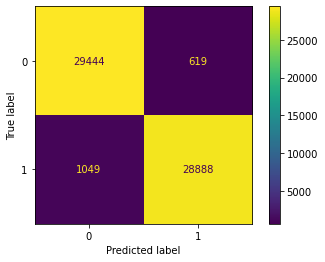

In [5]:
confusionMatrix(y_test_DTE, predicted, DTE_model, X_test_DTE)

Erstloesung
Schwierigkeit
Wochentag
ist_Schulzeit
MehrfachFalsch
Testposition__FT
Testposition__nt
Testposition__pruefung
Testposition__training
Testposition__version
Testposition__vt
Testposition__zt
beendet
Fehler
HA__HA
HA__Self
HA__nt
HA__vt
HA__zt
Klassenstufe
Jahredabei
Sex__m
Sex__w


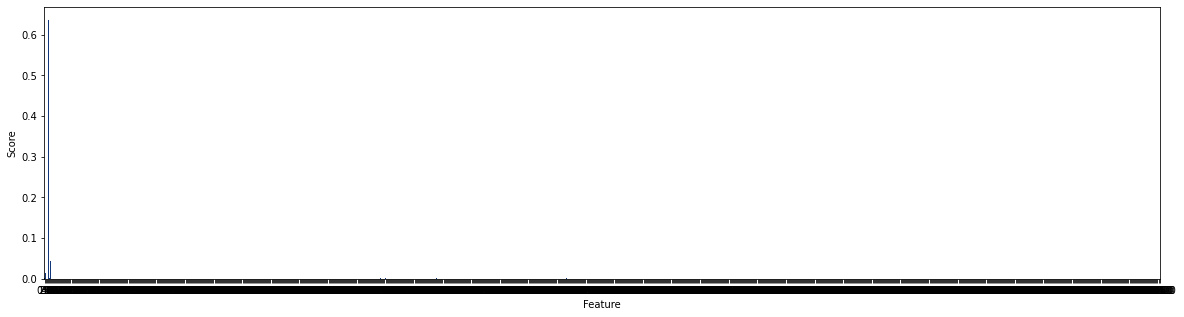

In [6]:
featureImportance(DTE_model)

<AxesSubplot:xlabel='0', ylabel='Count'>

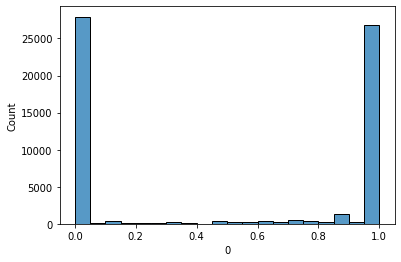

In [7]:
df_prob = pickle.load(open('../02_decisionTree/df_prob.pkl', 'rb'))
sns.histplot(data=df_prob, x=df_prob[0])

Logistic Regression

In [10]:
logreg_model = pickle.load(open('../03_logisticRegression/Logregmodel.pkl', 'rb'))
X_test_logreg = pickle.load(open('../03_logisticRegression/X_test.pkl', 'rb'))
y_test_logreg = pickle.load(open('../03_logisticRegression/y_test.pkl', 'rb'))

In [11]:
accuracy, precision, recall, f1 = calculateMetrics(logreg_model, X_test_logreg, y_test_logreg)
predicted = predictX(logreg_model, X_test_logreg)


Accuracy: 0.97
Precision: 0.97
Recall: 0.96
F1: 0.97


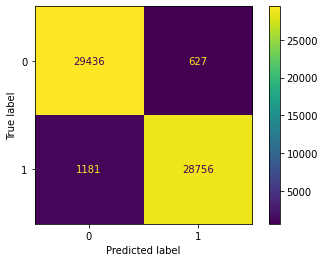

In [12]:
confusionMatrix(y_test_logreg, predicted, logreg_model, X_test_logreg)

<AxesSubplot:xlabel='0', ylabel='Count'>

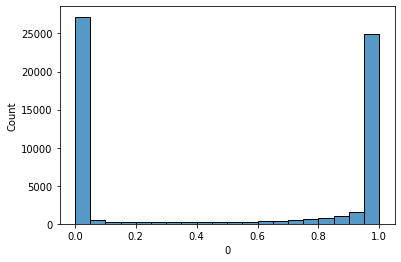

In [13]:
df_prob = pickle.load(open('../03_logisticRegression/df_prob.pkl', 'rb'))
sns.histplot(data=df_prob, x=df_prob[0])

SVM -> noch keine Ergebnisse, Modell rechnet noch

In [ ]:
# svm_model = pickle.load(open('../04_svm/SVM.pkl', 'rb'))
# X_test_svm = pickle.load(open('../04_svm/X_test.pkl', 'rb'))
# y_test_svm = pickle.load(open('../04_svm/y_test.pkl', 'rb'))

In [ ]:
# accuracy, precision, recall, f1 = calculateMetrics(svm_model, X_test_svm, y_test_svm)
# predicted = predictX(svm_model, X_test_svm)

In [ ]:
# confusionMatrix(y_test_svm, predicted, svm_model, X_test_svm)

In [ ]:
# featureImportance(svm_model)

Neural Network

In [14]:
nn_model = load_model('../05_nn/nn/')
X_test_nn = pickle.load(open('../05_nn/X_test.pkl', 'rb'))
y_test_nn = pickle.load(open('../05_nn/y_test.pkl', 'rb'))

In [15]:
accuracy, precision, recall, f1, predicted, predicted_classes = calculateMetricsNN(nn_model, X_test_nn, y_test_nn)

Accuracy: 0.97
Precision: 0.98
Recall: 0.96
F1: 0.97


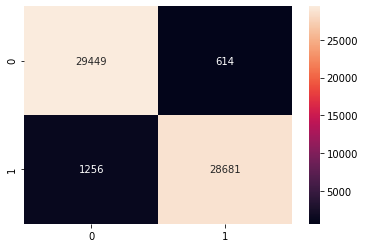

In [16]:
cm = metrics.confusion_matrix(y_test_nn, predicted_classes)
f = sns.heatmap(cm, annot=True, fmt='d')